In [23]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

In [24]:
num_vertices_set1 = [
    100, 133, 178, 237, 316, 422, 562, 745, 
    1000, 1330, 1780, 2370, 3160, 4220, 5620, 7450,
    10000, 13300, 17800, 23700, 31600, 42200, 56200, 74500,
    100000,
    #100000, 133000, 178000, 237000, 316000, 422000, 562000, 745000,
    #1000000, 
]
alpha_set = ["0.75"]
versions = ["ver1"]
versions_label = ["maxClique"]

time_result = []
tags = []
for ver in versions:
    for alpha in alpha_set:
        time_result.append([])
        tags.append(alpha + "_" + ver)
        for num_vertices in num_vertices_set1:
            # file open
            f = open("gen_data_result/{}_{}_{}.txt".format(num_vertices, alpha, ver), "r")
            tot = 0
            for i in range(100):
                num_clique, = map(int, f.readline().split())
                cliques = list(map(int, f.readline().split()))
                v, = map(float, f.readline().split())
                tot += v
            time_result[-1].append(tot / 100)
            f.close()

In [25]:
num_vertices_set2 = [
    100, 133, 178, 237, 316, 422, 562, 745, 
    1000, 1330, 1780, 2370, 3160, 4220, 5620, 7450,
    10000, 13300, 17800, 23700, 31600, 42200, 56200, 74500,
    100000, 133000, 178000, 237000, 316000, 422000, 562000, 745000,
    1000000, 
] 
alpha_set = ["0.75"]
versions = ["ver2", "ver3", "ver4"]
versions_label = ["maxCliqueRed", "maxCliqueSkip", "maxCliaueOpt"]

for ver in versions:
    for alpha in alpha_set:
        time_result.append([])
        tags.append(alpha + "_" + ver)
        for num_vertices in num_vertices_set2:
            # file open
            f = open("gen_data_result/{}_{}_{}.txt".format(num_vertices, alpha, ver), "r")
            tot = 0
            for i in range(100):
                num_clique, = map(int, f.readline().split())
                cliques = list(map(int, f.readline().split()))
                v, = map(float, f.readline().split())
                tot += v
            time_result[-1].append(tot / 100)
            f.close()


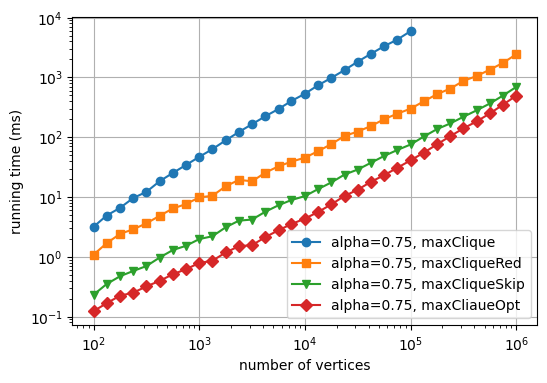

In [26]:
# plot the result (log-log scale)
plt.figure(figsize=(6, 4))

markers = ["o", "s", "v", "D"]
# version 1
for j in range(len(alpha_set)):
    plt.plot(num_vertices_set1, time_result[j], label="alpha={}, {}".format(alpha_set[j], "maxClique"), marker="o", linestyle="-")

# version 2, 3, 4
for i in range(len(versions)):
    for j in range(len(alpha_set)):
        plt.plot(num_vertices_set2, time_result[(i+1)*len(alpha_set)+j], label="alpha={}, {}".format(alpha_set[j], versions_label[i]), marker=markers[(i+1)*len(alpha_set)+j], linestyle="-")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("number of vertices")
plt.ylabel("running time (ms)")
plt.legend()
# plt.grid(True, which="both", ls="-");
plt.grid();
plt.show()


In [27]:
num_vertices_set1 = [
    100, 133, 178, 237, 316, 422, 562, 745, 
    1000, 1330, 1780, 2370, 3160, 4220, 5620, 7450,
    10000, 13300, 17800, 23700, 31600, 42200, 56200, 74500,
    100000,
    #100000, 133000, 178000, 237000, 316000, 422000, 562000, 745000,
    #1000000, 
]
alpha_set = ["0.65"]
versions = ["ver1"]

time_result = []
tags = []
for ver in versions:
    for alpha in alpha_set:
        time_result.append([])
        tags.append(alpha + "_" + ver)
        for num_vertices in num_vertices_set1:
            # file open
            f = open("gen_data_result/{}_{}_{}.txt".format(num_vertices, alpha, ver), "r")
            tot = 0
            for i in range(100):
                num_clique, = map(int, f.readline().split())
                cliques = list(map(int, f.readline().split()))
                v, = map(float, f.readline().split())
                tot += v
            time_result[-1].append(tot / 100)
            f.close()

In [28]:
num_vertices_set2 = [
    100, 133, 178, 237, 316, 422, 562, 745, 
    1000, 1330, 1780, 2370, 3160, 4220, 5620, 7450,
    10000, 13300, 17800, 23700, 31600, 42200, 56200, 74500,
    100000, 133000, 178000, 237000, 316000, 422000, 562000, 745000,
    1000000, 
] 
alpha_set = ["0.65"]
versions = ["ver2", "ver3", "ver4"]
versions_label = ["ver2", "ver3", "ver4"]

for ver in versions:
    for alpha in alpha_set:
        time_result.append([])
        tags.append(alpha + "_" + ver)
        for num_vertices in num_vertices_set2:
            # file open
            f = open("gen_data_result/{}_{}_{}.txt".format(num_vertices, alpha, ver), "r")
            tot = 0
            for i in range(100):
                num_clique, = map(int, f.readline().split())
                cliques = list(map(int, f.readline().split()))
                v, = map(float, f.readline().split())
                tot += v
            time_result[-1].append(tot / 100)
            f.close()


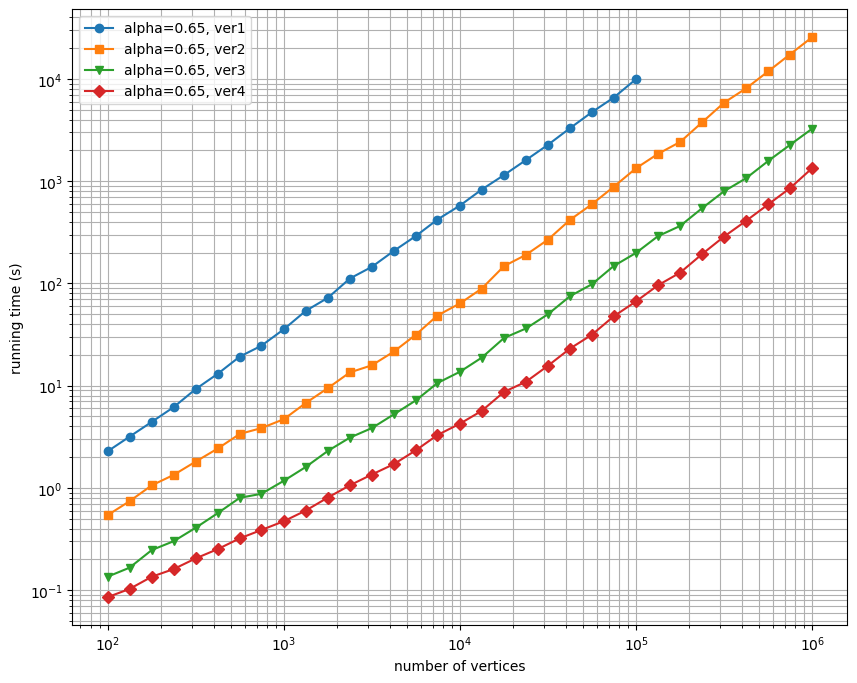

In [29]:
# plot the result (log-log scale)
plt.figure(figsize=(10, 8))

markers = ["o", "s", "v", "D"]
# version 1
for j in range(len(alpha_set)):
    plt.plot(num_vertices_set1, time_result[j], label="alpha={}, {}".format(alpha_set[j], "ver1"), marker="o", linestyle="-")

# version 2, 3, 4
for i in range(len(versions)):
    for j in range(len(alpha_set)):
        plt.plot(num_vertices_set2, time_result[(i+1)*len(alpha_set)+j], label="alpha={}, {}".format(alpha_set[j], versions[i]), marker=markers[(i+1)*len(alpha_set)+j], linestyle="-")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("number of vertices")
plt.ylabel("running time (s)")
plt.legend()
plt.grid(True, which="both", ls="-");
plt.show()


In [30]:
num_vertices_set2 = [
    100, 133, 178, 237, 316, 422, 562, 745, 
    1000, 1330, 1780, 2370, 3160, 4220, 5620, 7450,
    10000, 13300, 17800, 23700, 31600, 42200, 56200, 74500,
    100000, 133000, 178000, 237000, 316000, 422000, 562000, 745000,
    1000000, 
] 
alpha_set = ["0.75"]
versions = ["ver4", "ver5"]
versions_label = ["with geometry", "without geometry"]

time_result = []
tags = []
for ver in versions:
    for alpha in alpha_set:
        time_result.append([])
        tags.append(alpha + "_" + ver)
        for num_vertices in num_vertices_set2:
            # file open
            f = open("gen_data_result/{}_{}_{}.txt".format(num_vertices, alpha, ver), "r")
            tot = 0
            for i in range(100):
                num_clique, = map(int, f.readline().split())
                cliques = list(map(int, f.readline().split()))
                v, = map(float, f.readline().split())
                tot += v
            time_result[-1].append(tot / 100)
            f.close()


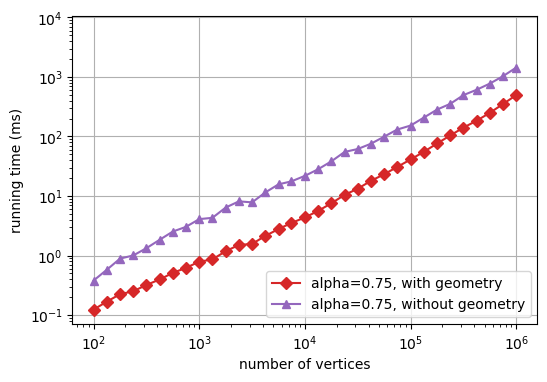

In [32]:
# plot the result (log-log scale)
plt.figure(figsize=(6, 4))

markers = ["D", "^"]
colors = ["tab:red", "tab:purple"]

for i in range(len(versions)):
    for j in range(len(alpha_set)):
        plt.plot(num_vertices_set2, time_result[(i)*len(alpha_set)+j], label="alpha={}, {}".format(alpha_set[j], versions_label[i]), marker=markers[(i)*len(alpha_set)+j], linestyle="-", color=colors[(i)*len(alpha_set)+j])
plt.xscale("log")
plt.yscale("log")
plt.xlabel("number of vertices")
plt.ylabel("running time (s)")
plt.legend(loc= "lower right")
plt.xlabel("number of vertices")
plt.ylabel("running time (ms)")
plt.ylim(7.05e-2, 1.05e4)
# plt.grid(True, which="both", ls="-");
plt.grid()
plt.show()
